In [1]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [2]:
from easyesn import SpatioTemporalESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import convolve

np.random.seed(42)

Using Numpy backend.


In [3]:
inputLength = 5000
size = 50

data = np.linspace(0, 20*np.pi, inputLength)
data = np.repeat(data, size*size).reshape(-1, size, size)

freq1 = np.tile(np.random.rand(size, size), (inputLength, 1, 1))*2+1 
freq2 = np.tile(np.random.rand(size, size), (inputLength, 1, 1))*2+1

inputData = np.sin(freq1*data).reshape(-1, size, size)
outputData = np.cos(freq1*data).reshape(-1, size, size)

filter1 = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])/9.0

for i in range(inputLength):
    outputData[i, :, :] = convolve(outputData[i, :, :], filter1)

trainingInput = inputData[:int(inputLength*0.7)]
validationInput = inputData[int(inputLength*0.3):]

trainingOutput = outputData[:int(inputLength*0.7)]
validationOutput = outputData[int(inputLength*0.3):]

In [4]:
esn = SpatioTemporalESN(inputShape=(size, size), filterSize=3, stride=1, borderMode="mirror", averageOutputWeights=True,
                        n_reservoir=100, regressionParameters=[1e-2], leakingRate=0.2, spectralRadius=0.8, solver="lsqr")

In [5]:
esn.fit(trainingInput, trainingOutput, transientTime=10, verbose=1)

100% (2500 of 2500) |#############################################################| Elapsed Time: 0:26:44 Time: 0:26:44


In [6]:
prediction = esn.predict(validationInput, transientTime=0, verbose=1)

100% (2500 of 2500) |#############################################################| Elapsed Time: 0:17:57 Time: 0:17:57


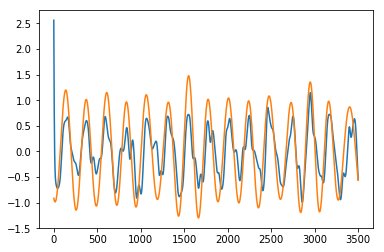

In [7]:
#plot the temporal evolution of one single point
plt.plot(prediction[:, 15, 15])
plt.plot(validationOutput[:, 15, 15])
plt.show()

In [8]:
#show MSE of entire field
np.mean((prediction-validationOutput)**2, axis=None)

0.22894364617900703

In [9]:
#show NRMSE of entire field
MSE = np.mean((prediction-validationOutput)**2, axis=None)
NMSE = np.mean((np.mean(trainingOutput)-validationOutput)**2, axis=None)
np.sqrt(MSE/NMSE)

0.65123819460806864